In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

### Loading data

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Cleaning the data

In [5]:
# deleting column id
df=df.drop(['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# displaying the number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Preprocessing the data

In [8]:
#checking null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Exploratory data analysis

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

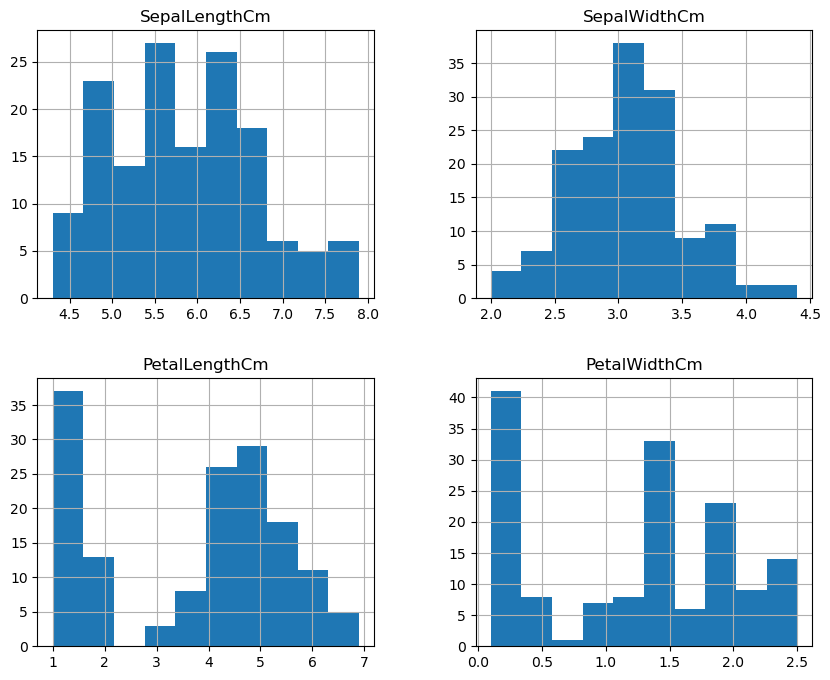

In [9]:
df.hist(figsize=(10,8))

#### In sepal width we have a normal distribution.


In [10]:
# Scatterplot
colors= ['red', 'blue', 'green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

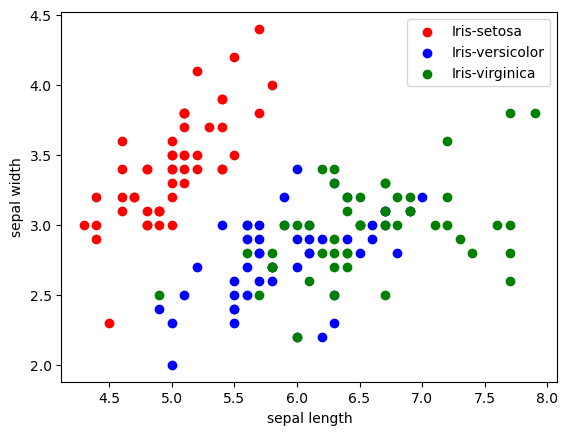

In [11]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

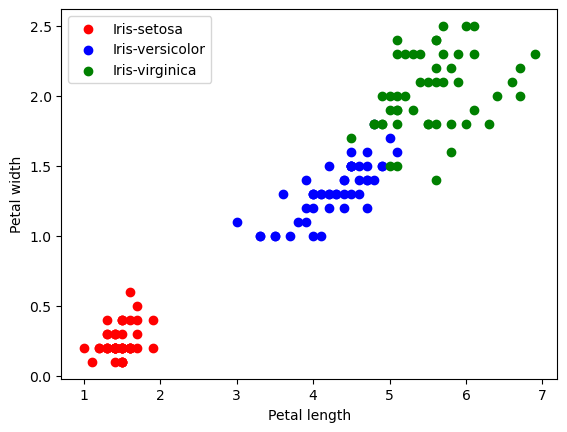

In [13]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

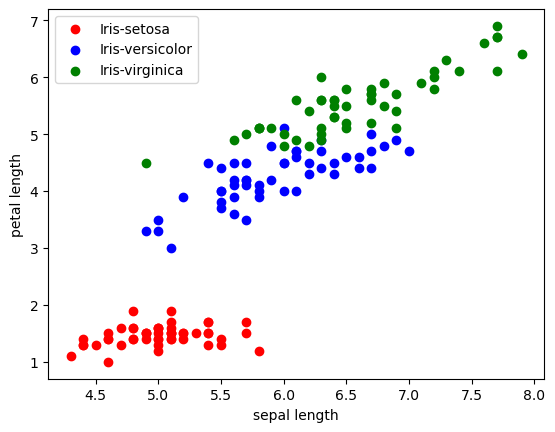

In [16]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

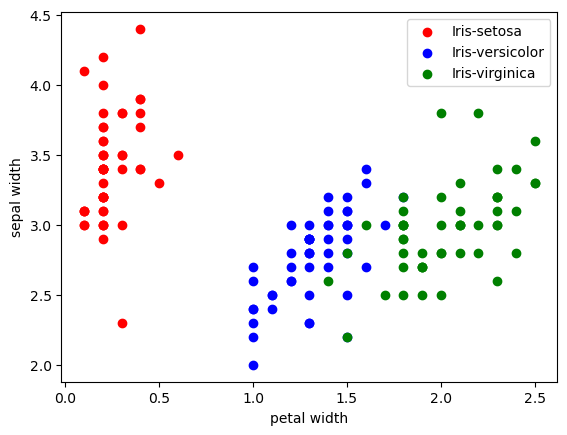

In [17]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalWidthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("petal width")
plt.ylabel("sepal width")
plt.legend()

### Coorelation Matrix
##### A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.(from google)

 #### The value ranges from -1 to 1. If two variables have high correlation, we can neglet one variable from those two.

In [18]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

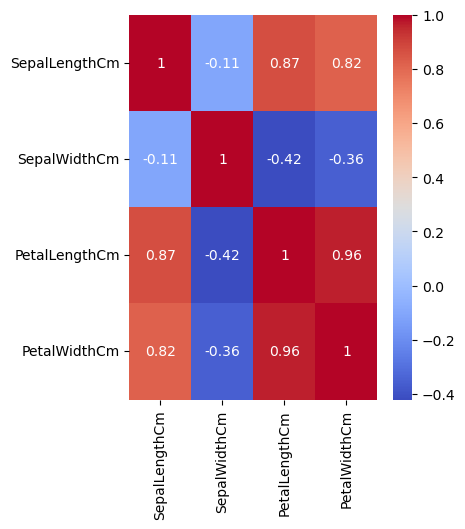

In [20]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(4,5))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

### Label Encoder

#### In machine learning, we usually deal with datasets that contain multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human-readable form, the training data is often labelled in words. 

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
#### Reference: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [21]:
# In this dataset it is in the categorical form and its in the form of string. Now we need to convert it into numerical form

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['Species']= le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Training the model

In [41]:
from sklearn.model_selection import train_test_split
# train= 70
#test=30


x = df.drop(columns=['Species'])
y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

In [42]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [44]:
# Print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


In [45]:
# import knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [46]:
# To train the model
model.fit(x_train, y_train)

KNeighborsClassifier()

In [47]:
# Print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 100.0


C:\Users\tabit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [49]:
# To train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
# Print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556
